# File Mount

In [1]:
# connect to your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change current path to a certain path(folder) in your drive.
# this folder may contain a image to be use in your homework.
# import os
# os.chdir('/content/drive/MyDrive/AI_DIG')
%cd /content/drive/MyDrive/AI_DIG/HW1

/content/drive/MyDrive/AI_DIG/HW1


# Downsampling & Upsampling

## Downsampling

![](https://i.imgur.com/0zrrdKy.png)

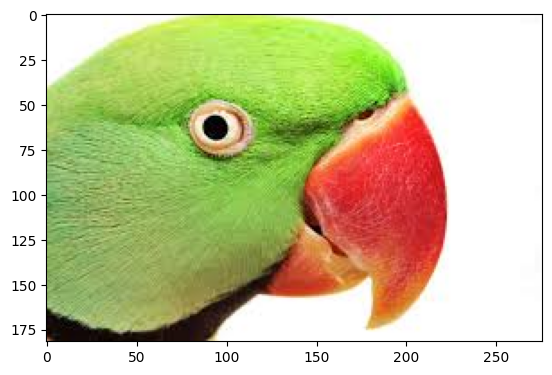

image shape:  (182, 276, 3)


In [26]:
# read your image here and show it
# you should cover with the image and its shape
img = cv2.imread('bird.jpg')
b,g,r = cv2.split(img)
img_RGB = cv2.merge([r,g,b])
plt.imshow(img_RGB)
plt.show()
print('image shape: ', img_RGB.shape)

In [27]:
# define a function that downsample the image with the input image matrix and the scale.
# the function will return a modefied image matrix.

def DownSamplingFunction(image,samplingScale):
  # plot the image and shape
  # -------------- To do ----------------- #
  downsampled_image = image[::samplingScale, ::samplingScale]

  return downsampled_image.astype('uint8')

### Downsampling Without Gaussian Filter

1/4 Image Shape: (46, 69, 3)
1/8 Image Shape: (23, 35, 3)


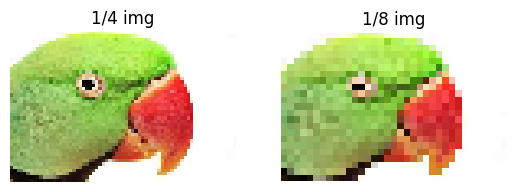

In [28]:
# plot your result with 2 scale, 1/4 and 1/8, also their shape.

# ----------- to do ------------------ #
# 1/4
downscale_factor = 4
one_four_img = DownSamplingFunction(image,downscale_factor)

# 1/8
downscale_factor = 8
one_eight_img = DownSamplingFunction(image,downscale_factor)

# plot the image and shape
# -------------- To do ----------------- #
print('1/4 Image Shape:', one_four_img.shape)
print('1/8 Image Shape:', one_eight_img.shape)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(one_four_img)
plt.title('1/4 img')
plt.axis('off')

# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(one_eight_img)
plt.title('1/8 img')
plt.axis('off')

plt.show()

### Downsampling With Gaussian Filter

1/4 Image Shape: (46, 69, 3)
1/8 Image Shape: (23, 35, 3)


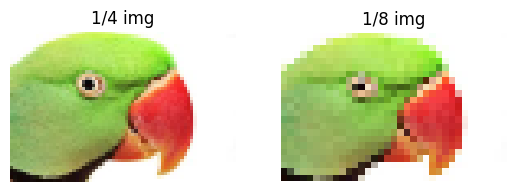

In [29]:
## Gaussian
# ----------- to do 1, filtering the image with gaussian ------------------ #
# you could grab the function from your previous work!
smoothed_image = cv2.GaussianBlur(image, (0, 0), sigmaX=1.0)

# ----------- to do 2, down sampling ------------------ #
# 2 scale, 1/4 and 1/8
downscale_factor = 4
one_four_img = DownSamplingFunction(smoothed_image,downscale_factor)

# 1/8
downscale_factor = 8
one_eight_img = DownSamplingFunction(smoothed_image,downscale_factor)

# ----------- to do 3, plot ------------------ #
#　plot your result and also their shape.
print('1/4 Image Shape:', one_four_img.shape)
print('1/8 Image Shape:', one_eight_img.shape)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(one_four_img)
plt.title('1/4 img')
plt.axis('off')

# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(one_eight_img)
plt.title('1/8 img')
plt.axis('off')

plt.show()

## Upsampling

Chosing the 1/8 downsampling picture for upsampling
using Nearest-neighbor interpolation

In [30]:
# ---------- to do 1, upsampling ------------ #
# using 1/8 image from previous work, using nearest neightbor method

upscale_factor = 8
upsampled_image = cv2.resize(one_eight_img, None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_NEAREST)

Original Image Shape: (182, 276, 3)
Downsampling Image Shape: (23, 35, 3)
Downsampling & Upsampling Image Shape: (184, 280, 3)


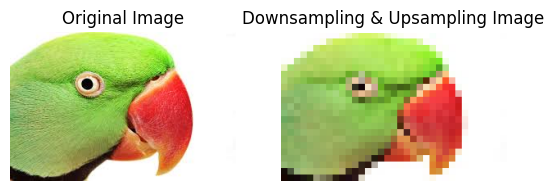

In [31]:
# ---------- to do 2, plot ------------ #
# you should cover with the result image and the shape
print('Original Image Shape:', image.shape)
print('Downsampling Image Shape:', one_eight_img.shape)
print('Downsampling & Upsampling Image Shape:', upsampled_image.shape)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(upsampled_image)
plt.title('Downsampling & Upsampling Image')
plt.axis('off')

plt.show()

# Bicubic Interpolation
You don't have to do this section. This is just a appendix.
### [Bicubic Interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation)
![](https://i.imgur.com/0WMYL73.png)

![](https://i.imgur.com/tQTZhga.png)

In [32]:
from tqdm import trange

# method 1, using package
img_bic = cv2.resize(one_eight_img, (image.shape[1],image.shape[0]), interpolation=cv2.INTER_CUBIC) #INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood


In [38]:
# method 2, hand craft function

def Bicubic_function(s,a=-0.5):
  s = np.abs(s)
  if s < 1:
    return (a+2)*np.power(s,3) - (a+3)*np.power(s,2) + 1
  elif s < 2:
    return a*np.power(s,3) - 5*a*np.power(s,2) + 8*a*s - 4*a
  else:
    return 0

def bicubic(img, ratio, a):
  W = int(img.shape[1]*ratio)
  H = int(img.shape[0]*ratio)
  img = padding_img(img,2,style='edge')
  dst = np.zeros((H, W, 3))
  delta = 1/ratio
  a=-0.5

  for c in range(3):
    for j in trange(H):
      for i in range(W):
        x, y = i * delta + 2, j * delta + 2

        # distance
        x1 = 1 + x - int(x) # negtive
        x2 = x - int(x)
        x3 = int(x) + 1 - x
        x4 = int(x) + 2 - x

        y1 = 1 + y - int(y) # negtive
        y2 = y - int(y)
        y3 = int(y) + 1 - y
        y4 = int(y) + 2 - y

        vec_x = np.array([[Bicubic_function(x1,a),Bicubic_function(x2,a),Bicubic_function(x3,a),Bicubic_function(x4,a)]])
        matrix = np.array([[img[int(y-y1), int(x-x1), c], img[int(y-y2), int(x-x1), c], img[int(y+y3), int(x-x1), c], img[int(y+y4), int(x-x1), c]],
                   [img[int(y-y1), int(x-x2), c], img[int(y-y2), int(x-x2), c], img[int(y+y3), int(x-x2), c], img[int(y+y4), int(x-x2), c]],
                   [img[int(y-y1), int(x+x3), c], img[int(y-y2), int(x+x3), c], img[int(y+y3), int(x+x3), c], img[int(y+y4), int(x+x3), c]],
                   [img[int(y-y1), int(x+x4), c], img[int(y-y2), int(x+x4), c], img[int(y+y3), int(x+x4), c], img[int(y+y4), int(x+x4), c]]])
        vec_y = np.array([[Bicubic_function(y1,a)], [Bicubic_function(y2,a)], [Bicubic_function(y3,a)], [Bicubic_function(y4,a)]])

        dst[j,i,c] = np.matmul(np.matmul(vec_x,matrix),vec_y)
  return np.clip(dst, 0, 255).astype('uint')



img_bic_hand = bicubic(one_eight_img, 8, -0.5)

100%|██████████| 184/184 [00:06<00:00, 29.07it/s]


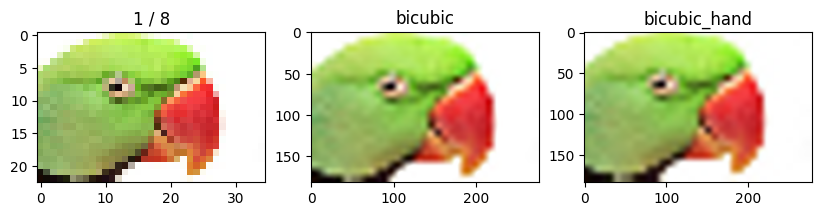

1/8 shape:  (23, 35, 3)
upsampling shape:  (182, 276, 3)
upsampling shape:  (184, 280, 3)


In [39]:
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.title('1 / 8')
plt.imshow(one_eight_img)
plt.subplot(1,3,2)
plt.title('bicubic')
plt.imshow(img_bic)
plt.subplot(1,3,3)
plt.title('bicubic_hand')
plt.imshow(img_bic_hand)
plt.show()

print('1/8 shape: ', one_eight_img.shape)
print('upsampling shape: ', img_bic.shape)
print('upsampling shape: ', img_bic_hand.shape)